In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/Ecommerce (2).csv')

In [ ]:
df.head()

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,1,32.538350,12.028846,35.850540,3.648854,576.098273
1,2,34.206718,12.226851,37.246443,1.987536,460.784955
2,3,31.535240,11.814341,36.610697,3.351191,349.739791
3,4,32.199577,11.295163,37.425695,5.234337,547.709921
4,5,33.570137,13.500972,36.856165,3.938603,487.055641


In [ ]:
df.describe()

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,312.000000,33.039429,12.001459,37.079018,3.514850,499.600023
std,179.988889,0.949071,0.996609,0.991753,0.948063,80.032965
min,1.000000,29.972300,9.273248,33.751071,0.891398,256.670000
25%,156.500000,32.375680,11.334163,36.376725,2.906558,447.665160
50%,312.000000,33.044399,11.998823,37.113631,3.504771,498.806136
75%,467.500000,33.700947,12.647695,37.773880,4.140305,551.257208
max,623.000000,35.744415,15.138317,40.808388,6.553916,775.337626


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer ID           623 non-null    int64  
 1   Avg Session length    623 non-null    float64
 2   Time on App           623 non-null    float64
 3   Time on Website       623 non-null    float64
 4   Length of MemberShip  623 non-null    float64
 5   Yealy amount spent    623 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 29.3 KB


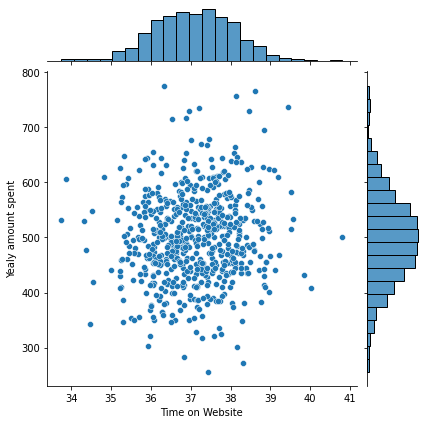

In [ ]:
sns.jointplot(x='Time on Website',y ='Yealy amount spent', data =df)

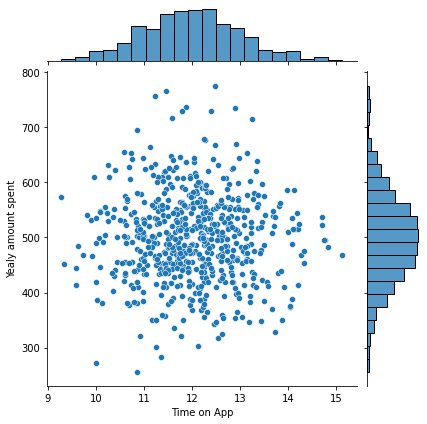

In [ ]:
sns.jointplot(x='Time on App',y ='Yealy amount spent', data =df)

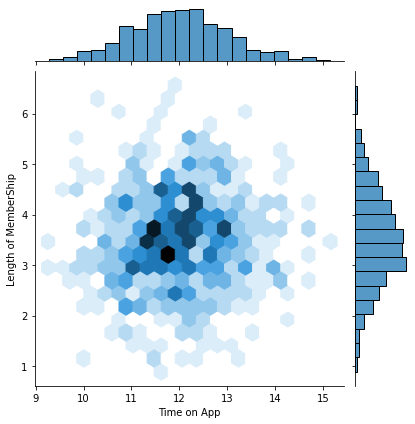

In [ ]:
sns.jointplot(x='Time on App',y ='Length of MemberShip', data = df, kind='hex')

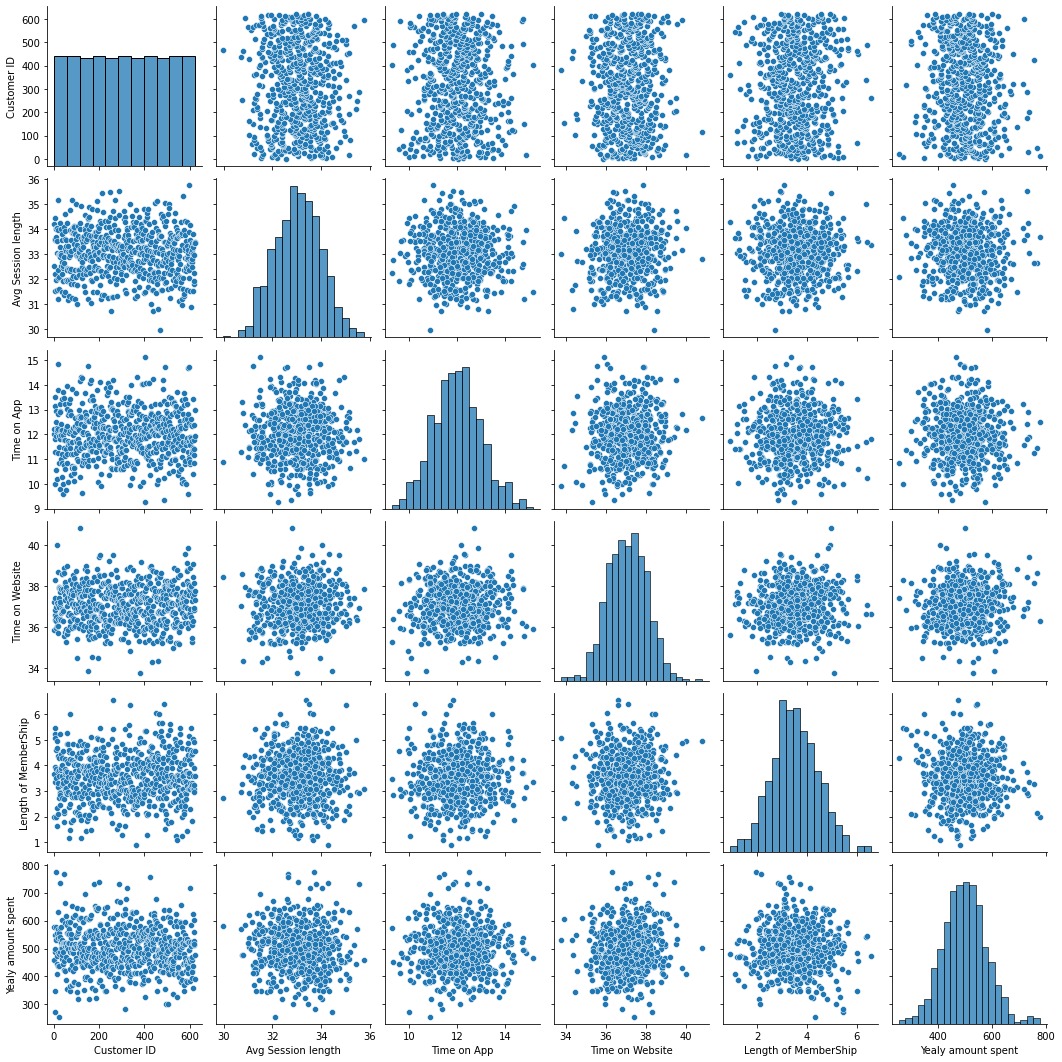

In [ ]:
sns.pairplot(df)

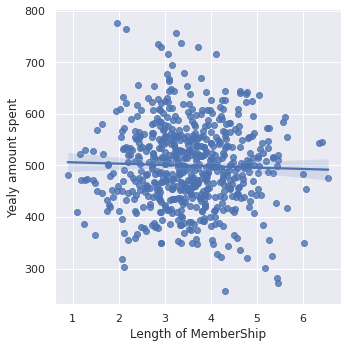

In [ ]:
sns.set(color_codes=True)
sns.lmplot(x='Length of MemberShip', y='Yealy amount spent',data=df)

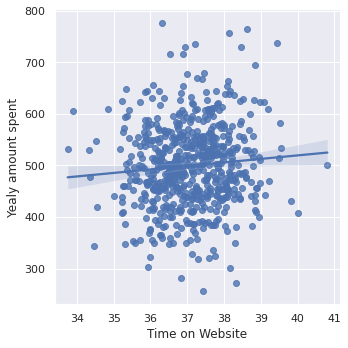

In [ ]:
sns.set(color_codes=True)
sns.lmplot(x='Time on Website', y='Yealy amount spent',data=df)

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x.head()

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip
0,1,32.538350,12.028846,35.850540,3.648854
1,2,34.206718,12.226851,37.246443,1.987536
2,3,31.535240,11.814341,36.610697,3.351191
3,4,32.199577,11.295163,37.425695,5.234337
4,5,33.570137,13.500972,36.856165,3.938603


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
print(linreg.coef_)

[-0.03562958 -7.117215   -2.43344688  8.07755723 -1.02263949]


In [ ]:
Prediction = linreg.predict(xtest)

Text(0.5, 0, 'Y test')

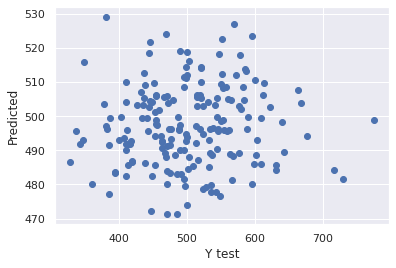

In [ ]:
plt.scatter(ytest, Prediction)
plt.ylabel('Predicted')
plt.xlabel('Y test')

In [ ]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(Prediction, Prediction)))
print('MSE: {}'.format(metrics.mean_squared_error(ytest, Prediction)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(ytest, Prediction))))

MAE: 0.0
MSE: 6005.999954068951
RMSE: 77.49838678365474


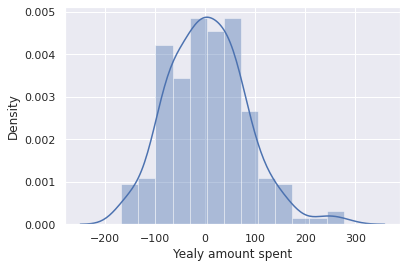

In [ ]:
sns.distplot((ytest-Prediction))

In [ ]:
df2 = pd.DataFrame(linreg.coef_ , x.columns, columns=['Coeffecient'])
df2

,Coeffecient
Customer ID,-0.035630
Avg Session length,-7.117215
Time on App,-2.433447
Time on Website,8.077557
Length of MemberShip,-1.022639


>*Conclusion*

We still want to figure out the answer to the original question, do we focus our efforst on mobile app and lenth of membership and Avg session length ? As per the obtained relations as per the yearly money spent , its clear websites brings in most. 